<img src="imgs/sklearn.png" width="50%" />

## Sklearn: The Python Machine Learning library

The Scikit-learn Python library, initially released in 2007, is commonly used in solving machine learning and data science problems—**from the beginning to the end**. The versatile library offers an **uncluttered, consistent, and efficient API** and thorough online documentation.

What is Scikit-learn?
Scikit-learn is an open source Python library that has powerful tools for data analysis and data mining. It's available under the BSD license and is built on the following machine learning libraries:

1. NumPy, a library for manipulating multi-dimensional arrays and matrices. It also has an extensive compilation of mathematical functions for performing various calculations.
2. SciPy, an ecosystem consisting of various libraries for completing technical computing tasks.
3. Matplotlib, a library for plotting various charts and graphs.

Scikit-learn offers an extensive range of built-in algorithms that make the most of data science projects. It is very friendly to new data scientists.


<img src="imgs/modules.jpg" width="90%" />

In Sklearn, six API modules are provided. They are **Classification, Regression, Clustering, Dimensionality Reduction, Model Selection, Preprocessing**. To use these APIs, you may refer to the following pseudo codes:

1. **Classification**
```
from sklearn import SomeClassifier
from sklearn.linear_model import SomeClassifier
from sklearn.ensemble import SomeClassifier
```

2. **Regression**
```
from sklearn import SomeRegressor
from sklearn.linear_model import SomeRegressor
from sklearn.ensemble import SomeRegressor
```

3. **Clustering**
```
from sklearn.cluster import SomeModel
```

4. **Dimensionality Reduction**
```
from sklearn.decomposition import SomeModel
```

5. **Model Selection**
```
from sklearn.model_selection import SomeModel
```


6. **Preprocessing**
```
from sklearn.preprocessing import SomeModel
```

SomeClassifier, SomeRegressor, SomeModel all belong to estimator. **In python, everything is object, while everything is estimator in sklearn.**

In addition, Sklearn also provide some datasets

7. **Dataset**
```
from sklearn.datasets import SomeData
```

## Agenda

1. Data Format in Sklearn
2. Estimator APIs

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

##  Part 1 Data Format

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

![Data Layout](imgs/data_sklearn.png)

(Figure from the [Top ML Interview Questions](https://www.i2tutorials.com/top-machine-learning-interview-questions-and-answers/what-do-you-mean-by-features-and-labels-in-a-dataset/))

#### A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.

<img src="imgs/iris_setosa.jpg" width="30%" />

**Iris Setosa**

<img src="imgs/iris_versicolor.jpg" width="30%" />

**Iris Versicolor**

<img src="imgs/iris_virginica.jpg" width="30%" />

**Iris Virginica**

##### Quick Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

##### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [4]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

%matplotlib is a magic function in ipython.

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [7]:
%matplotlib inline

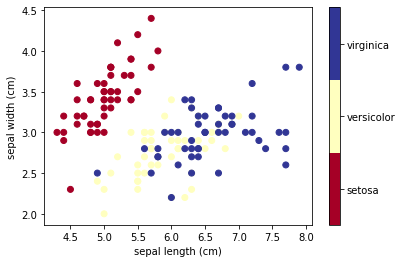

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

When we are doing our own data science tasks, the most common case is that we are using **PANDAS** to read csv and txt and load them into meomry as **Dataframe**


<img src="imgs/pandas.jpg" width="40%" />

##  Part 2 Sklearn APIs

As we said, everything in Sklearn is estimator. Too abstract? 

Estimator can be model, algorithm, or any preprocessing pipelines.

### Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.predict()` : predict labels in clustering algorithms.
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

#### Here, we quick review classification, dimensionality reduction and clustering

####  2.1 Classification： KNN

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

In [8]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [9]:
X, y = iris.data, iris.target
# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 2cm x 5cm sepal and 1cm x 25cm petal?
# call the "predict" method:
result = knn.predict([[2, 5, 1, 5],])

print(iris.target_names[result])

# You can also do probabilistic predictions

knn.predict_proba([[2, 5, 1, 5],])

['setosa']


array([[1., 0., 0.]])

#### Question: why the following code is not working?

In [10]:
result = knn.predict([[2, 5, 1, 5]])
#if we dont do the list of list we will face error since sklearn can only take 2d data

####  2.2 Dimensionality Reduction ： PCA

Principle Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

In [11]:
X, y = iris.data, iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (150, 2)


In [13]:
import matplotlib.pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


#### 2.3 Clustering: K-means

Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.

Note that these clusters will uncover relevent hidden structure of the data only if the criterion used highlights it.

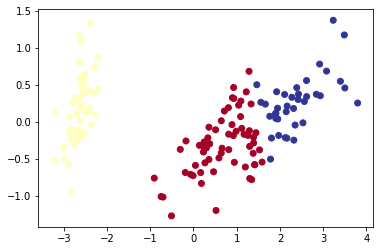

In [14]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

#### Sklearn Model Cheat Sheet: An Awesome Reference

It is a nice graph summary of which model should be used in various cases. 

Credit: [Andreas Mueller](https://github.com/amueller), a main contributor to sklearn.

<img src="imgs/ml_map.png" width="100%" />

In the following weeks, we are going to explore more high-level features such as meta-estimators(pipeline, model selection, ensemble) in sklern.